# Linear Regression | Pipeline | Save and Load a trained Model | Model Evaluation

Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

## Simple Linear Regression

Simple linear regression is an approach for predicting a response using a single feature. It is assumed that the two variables are linearly related. Hence, we try to find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x).

The linear function can be represented as:
$$
y = mx + c
$$
Where:
- y is the response
- x is the feature
- m is the slope
- c is the intercept
- m and c are the coefficients of the model
  
The model is trained on a dataset with features(x) and target(y). It learns the values of coefficients m and c that minimize the difference between actual values in the dataset and predicted values by the model. The difference between actual values and predicted values is known as the cost function. The model optimizes the cost function using the gradient descent algorithm.

## Multiple Linear Regression

Multiple linear regression is an extension of simple linear regression as it takes more than one feature to predict the response. The linear function can be represented as:
$$
y = m1x1 + m2x2 + m3x3 + ... + c
$$
Where:
- y is the response
- x1, x2, x3, ... are the features
- m1, m2, m3, ... are the coefficients of the model
- c is the intercept
- m1, m2, m3, ... and c are the coefficients of the model

The model is trained on a dataset with features(x) and target(y). It learns the values of coefficients m1, m2, m3, ... and c that minimize the difference between actual values in the dataset and predicted values by the model. The difference between actual values and predicted values is known as the cost function. The model optimizes the cost function using the gradient descent algorithm.

In [24]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression

In [25]:
# import the data
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


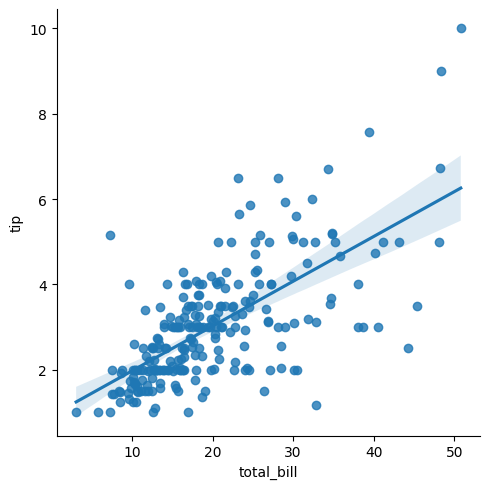

In [26]:
sns.lmplot(x='total_bill', y='tip', data=df)

In [27]:
# preprocess the data
scalar = StandardScaler()
df[['total_bill', 'tip']] = scalar.fit_transform(df[['total_bill', 'tip']])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,Female,No,Sun,Dinner,2
1,-1.063235,-0.969205,Male,No,Sun,Dinner,3
2,0.137780,0.363356,Male,No,Sun,Dinner,3
3,0.438315,0.225754,Male,No,Sun,Dinner,2
4,0.540745,0.443020,Female,No,Sun,Dinner,4


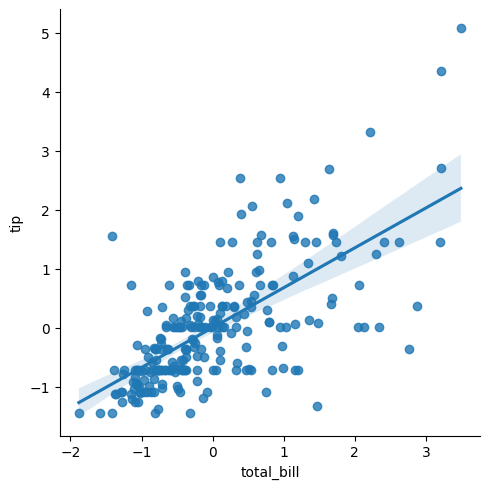

In [28]:
sns.lmplot(x='total_bill', y='tip', data=df)

In [29]:
# separate the features X and the target/labels y
X = df[['total_bill']]
y = df['tip']

In [30]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [31]:
# call the model
model = LinearRegression()

In [32]:
%%time
# train the model
model.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 22.5 ms


LinearRegression()

In [33]:
model.predict([[15]])

array([10.35454829])

In [34]:
# prediction
y_pred = model.predict(X_test)

In [35]:
# evaluation the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
# root mean squared error
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  0.2983382530785567
R2:  0.5449381659234667
MAPE:  7.369211703304975
MAE:  0.4496364577054319
RMSE:  0.5462034905404365


# Save and load a trained Machine Learning model

After training a machine learning model, it is important to save the model to a file. This is because training a machine learning model can be computationally expensive and time-consuming. Saving the model to a file allows us to use the trained model in the future without having to retrain it. In this notebook, we will see how to save and load a trained machine learning model using the `pickle` library in Python.

In [36]:
# save the model
import pickle
# create folder to save the model if exists remove it
import os
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')
# save the model
pickle.dump(model, open('./saved_models/01_linear_regression.pkl', 'wb'))

In [37]:
# load the model
import pickle
model_load = pickle.load(open('./saved_models/01_linear_regression.pkl', 'rb'))
model_load.predict([[1500.5]])

array([1032.69194685])

# Multilinear Regression

Multi-linear regression is a type of regression analysis that is used to predict the relationship between two or more independent variables and one dependent variable. In this notebook, we will use the `sklearn` library to create a multi-linear regression model and save it to a file. We will then load the model from the file and use it to make predictions.

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')


# load the data
df = sns.load_dataset('tips')
df.head()

X = df[['total_bill', 'size', 'day']]
y = df['tip']

# preprocess the data
scalar = StandardScaler()
X[['total_bill', 'size']] = scalar.fit_transform(X[['total_bill', 'size']])
le = LabelEncoder()
X['day'] = le.fit_transform(X['day'])

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# call the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

# metric to evaluate the model
y_pred = model.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 0.6566031847646813
R2 Score: 0.4747054104497257
Mean Absolute Error: 0.6656656656006282
Mean Absolute Percentage Error: 0.2789919978935491
Root Mean Squared Error: 0.8103105483483979


## Using Pipleline

In this notebook, we will use the `Pipeline` class from the `sklearn` library to create a multi-linear regression model. The `Pipeline` class allows us to chain multiple estimators into a single estimator. This makes it easier to work with multiple steps in a machine learning workflow.

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('tips')
# separate the features X and the target/labels y
X = df[['total_bill', 'size', 'day']]
y = df['tip']

# numeric features
numeric_features = ['total_bill', 'size']
# categorical features
categorical_features = ['day']

# preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# pipeline
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]
)

# fit the model
pipeline.fit(X_train, y_train)

# metric to evaluate the model
y_pred = pipeline.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 0.6655725405795047
R2 Score: 0.46752976130485213
Mean Absolute Error: 0.6591957722968487
Mean Absolute Percentage Error: 0.2730622135259165
Root Mean Squared Error: 0.8158262931405831


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## Go for big data

We will use diamonds dataset from seaborn library. The dataset contains the following columns:
- `carat`: weight of the diamond (0.2--5.01)
- `cut`: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- `color`: diamond colour, from J (worst) to D (best)
- `clarity`: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- `depth`: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- `table`: width of top of diamond relative to widest point (43--95)
- `price`: price in US dollars (\$326--\$18,823)
- `x`: length in mm (0--10.74)
- `y`: width in mm (0--58.9)
- `z`: depth in mm (0--31.8)

In [41]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('diamonds')

# separate the features X and the target/labels y
X = df.drop('price', axis=1)
y = df['price']

# numeric features
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
# categorical features
categorical_features = ['cut', 'color', 'clarity']

# preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# pipeline
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]
)

# fit the model
pipeline.fit(X_train, y_train)

# metric to evaluate the model
y_pred = pipeline.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 1288705.4778516763
R2 Score: 0.9189331350419386
Mean Absolute Error: 737.1513665933285
Mean Absolute Percentage Error: 0.3952933516494362
Root Mean Squared Error: 1135.2116445190634
CPU times: total: 93.8 ms
Wall time: 167 ms


In [42]:
df['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

## Interpretation of the model Metrics

The Metrics indicate the performance of your regression model. 

Here's a brief interpretation:

- **Mean Squared Error (MSE)**: 1288813.63 - This value represents the average of the squares of the errors. A lower MSE indicates a better fit, but the value itself is not very interpretable without context. 
    > `e.g:` if the target variable is in the range of 0-100, an MSE of 1288813.63 is high, but if the target variable is in the range of 100000-1000000, then the MSE is low. 

- **R2 Score**: 0.9189 - This value indicates that approximately 91.89% of the variance in the dependent variable (price) is predictable from the independent variables. An R2 score close to 1 indicates a good fit.
    > `e.g:` if the R2 score is 0.9189, it means that 91.89% of the variance in the price can be explained by the independent variables in the model.


- **Mean Absolute Error (MAE)**: 736.91 - This value represents the average absolute difference between the predicted and actual values. Lower values indicate better performance.
    > `e.g:` if the MAE is 736.91, it means that, on average, the model's predictions are off by $736.91.


- **Mean Absolute Percentage Error (MAPE)**: 0.3951 - This value represents the average absolute percentage difference between the predicted and actual values. Lower values indicate better performance.
    > `e.g:` if the MAPE is 0.3951, it means that, on average, the model's predictions are off by 39.51%.

- **Root Mean Squared Error (RMSE)**: 1135.26 - This value is the square root of the MSE and provides a measure of the average magnitude of the error. Lower values indicate better performance.
    > `e.g:` if the RMSE is 1135.26, it means that, on average, the model's predictions are off by $1135.26.

Overall, the R2 score of 0.9189 suggests that your model explains a significant portion of the variance in the data, which is a good sign. However, the MSE, MAE, and RMSE values are relatively high, indicating that there is still room for improvement in the model's accuracy.

## Conclusion

In this notebook, we created a multi-linear regression model using the `sklearn` library and saved it to a file. We then loaded the model from the file and used it to make predictions. We also evaluated the model's performance using various metrics such as MSE, R2 score, MAE, MAPE, and RMSE. The results indicate that the model explains a significant portion of the variance in the data but has room for improvement in terms of accuracy.

# **15 Ways to improve the ML Model's performance?**

1. **Feature Engineering**: Create new features that capture additional information from the data.
2. **Hyperparameter Tuning**: Optimize the model's hyperparameters to improve performance.
3. **Regularization**: Apply regularization techniques to prevent overfitting.
4. **Ensemble Methods**: Use ensemble methods such as Random Forest or Gradient Boosting to improve predictive performance.
5. **Cross-Validation**: Use cross-validation to assess the model's performance more accurately.
6. **Feature Selection**: Identify and select the most relevant features for the model.
7. **Data Preprocessing**: Clean and preprocess the data to improve model performance.
8. **Model Selection**: Experiment with different regression models to find the best fit for the data.
9. **Error Analysis**: Analyze the model's errors to identify patterns and areas for improvement.
10. **Domain Knowledge**: Incorporate domain knowledge to improve the model's predictive power.
11. **Data Augmentation**: Increase the size of the training data through data augmentation techniques.
12. **Model Stacking**: Combine multiple models to improve predictive performance.
13. **Model Interpretation**: Interpret the model's predictions to gain insights into the data and improve performance.
14. **Model Deployment**: Deploy the model in a production environment and monitor its performance over time.
15. **Feedback Loop**: Incorporate feedback from users and stakeholders to continuously improve the model.

<h2 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: Dr. Muhammad Aammar Tufail</h2>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/AammarTufail) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/muhammadaammartufail) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/dr-muhammad-aammar-tufail-02471213b/)  

[![YouTube](https://img.shields.io/badge/YouTube-Profile-red?style=for-the-badge&logo=youtube)](https://www.youtube.com/@codanics) 
[![Facebook](https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook)](https://www.facebook.com/aammar.tufail) 
[![TikTok](https://img.shields.io/badge/TikTok-Profile-black?style=for-the-badge&logo=tiktok)](https://www.tiktok.com/@draammar)  

[![Twitter/X](https://img.shields.io/badge/Twitter-Profile-blue?style=for-the-badge&logo=twitter)](https://twitter.com/aammar_tufail) 
[![Instagram](https://img.shields.io/badge/Instagram-Profile-blue?style=for-the-badge&logo=instagram)](https://www.instagram.com/aammartufail/) 
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:aammar@codanics.com)


# How to improve the ML model Performance?

In [43]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('diamonds')

# separate the features X and the target/labels y
X = df.drop('price', axis=1)
y = df['price']

# numeric features
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
# categorical features
categorical_features = ['cut', 'color', 'clarity']

# preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# pipeline
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', DecisionTreeRegressor())
    ]
)

# fit the model
pipeline.fit(X_train, y_train)

# metric to evaluate the model
y_pred = pipeline.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 543812.319683908
R2 Score: 0.9657911286635972
Mean Absolute Error: 357.0974694104561
Mean Absolute Percentage Error: 0.08559110685834051
Root Mean Squared Error: 737.4363156801461
CPU times: total: 422 ms
Wall time: 480 ms


In [44]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('diamonds')

# separate the features X and the target/labels y
X = df.drop('price', axis=1)
y = df['price']

# numeric features
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
# categorical features
categorical_features = ['cut', 'color', 'clarity']

# preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# pipeline
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor())
    ]
)

# fit the model
pipeline.fit(X_train, y_train)

# metric to evaluate the model
y_pred = pipeline.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 302098.2891586073
R2 Score: 0.9809963085963535
Mean Absolute Error: 270.6158551885252
Mean Absolute Percentage Error: 0.0650676124903688
Root Mean Squared Error: 549.6346870045661
CPU times: total: 20.1 s
Wall time: 21.4 s


In [45]:
# !pip install xgboost --quiet

In [46]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
# XGboost models
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('diamonds')

# separate the features X and the target/labels y
X = df.drop('price', axis=1)
y = df['price']

# numeric features
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
# categorical features
categorical_features = ['cut', 'color', 'clarity']

# preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# pipeline
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', XGBRegressor())
    ]
)

# fit the model
pipeline.fit(X_train, y_train)

# metric to evaluate the model
y_pred = pipeline.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 318286.3125
R2 Score: 0.9799779653549194
Mean Absolute Error: 285.61346435546875
Mean Absolute Percentage Error: 0.07398492097854614
Root Mean Squared Error: 564.1686915276316
CPU times: total: 2.33 s
Wall time: 437 ms


# MLR
- Mean Squared Error: 1288813.6340378197
- R2 Score: 0.9189263314059744
- Mean Absolute Error: 736.9080459770115
- Mean Absolute Percentage Error: 0.3950714565701874
- Root Mean Squared Error: 1135.2592805336672

# Decision Tree
- Mean Squared Error: 549017.3375509826
- R2 Score: 0.9654637035941873
- Mean Absolute Error: 359.56655543196143
- Mean Absolute Percentage Error: 0.08604352592144883
- Root Mean Squared Error: 740.9570416366813

# Random Forest
- Mean Squared Error: 307525.9870314578
- R2 Score: 0.9806548756948459
- Mean Absolute Error: 272.0160216422127
- Mean Absolute Percentage Error: 0.06513102240582337
- Root Mean Squared Error: 554.5502565425949

# XGBoost
- Mean Squared Error: 318286.3109612889
- R2 Score: 0.9799779653549194
- Mean Absolute Error: 285.6134524615906
- Mean Absolute Percentage Error: 0.07398491535044392
- Root Mean Squared Error: 564.168690163934